In [1]:
import h5py
import json
import matplotlib.pyplot as plt
import numpy as np

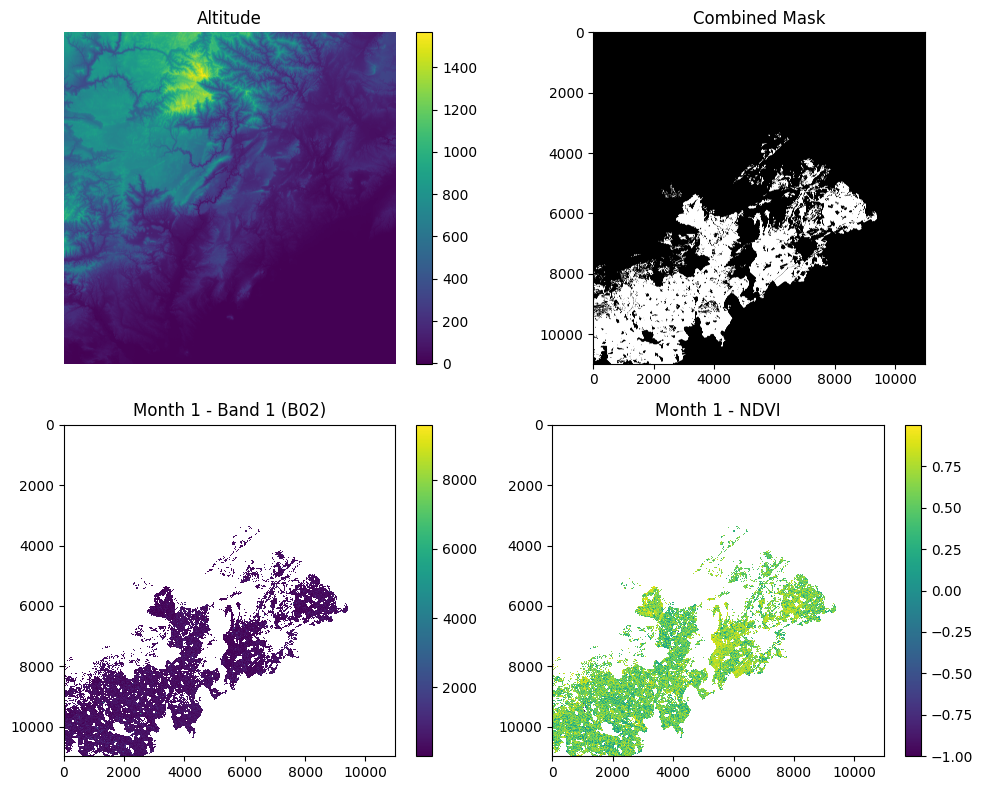


Metadata:
  - driver: JP2OpenJPEG
  - dtype: uint16
  - nodata: None
  - width: 10980
  - height: 10980
  - count: 1
  - crs: EPSG:32631
  - transform: | 10.00, 0.00, 499980.00|
| 0.00,-10.00, 4900020.00|
| 0.00, 0.00, 1.00|


In [7]:
# Open the HDF5 file
with h5py.File('hypercube.h5', 'r') as hdf_file:
    # Check altitude data
    altitude_data = hdf_file['altitude'][:]
    altitude_data = np.where(np.isfinite(altitude_data), np.where(altitude_data < -500, 0, altitude_data), np.nan)
    altitude_data = np.where(np.isnan(altitude_data), 0, altitude_data)
    plt.figure(figsize=(10, 8))
    plt.subplot(2, 2, 1)
    plt.imshow(altitude_data)
    plt.axis("off")
    plt.title('Altitude')
    plt.colorbar()

    # Check mask data
    mask_data = hdf_file['mask'][:]
    
    plt.subplot(2, 2, 2)
    plt.imshow(mask_data, cmap='gray')
    plt.title('Mask')

    # Check monthly hypercubes data and wplot sample bands for a selected month
    selected_month = 1  # Change this value to visualize data for a different month
    dataset_name = f'month_{selected_month}'
    
    if dataset_name in hdf_file:
        month_data = hdf_file[dataset_name][:]
        plt.subplot(2, 2, 3)
        plt.imshow(month_data[:, :, 0], interpolation='nearest')  # Plot the first band (e.g., B02)
        plt.title(f'Month {selected_month} - Band 1 (B02)')
        plt.colorbar()

        plt.subplot(2, 2, 4)
        plt.imshow(month_data[:, :, 4], interpolation='nearest')  # Plot the NDVI band
        plt.title(f'Month {selected_month} - NDVI')
        plt.colorbar()
    else:
        print(f"Month {selected_month} data not found.")

    plt.tight_layout()
    plt.show()

    # Check metadata
    if 'meta' in hdf_file.attrs:
        meta_serialized = hdf_file.attrs['meta']
        meta = json.loads(meta_serialized)
        print("\nMetadata:")
        for key, value in meta.items():
            print(f"  - {key}: {value}")
    else:
        print("\nMetadata not found.")
